# 1. Introduction

### 1.1 Background

- Datenanalyse zum Thema "Newspaper Scraping"  im Rahmen des Moduls "Applied-Data-Science I: Tools der Softwareentwicklung und Online-Daten"
- Thematischer Fokus der Analyse: Polarisierende Berichterstattung zu Klimaprotesten am Beispiel des Begriffs "Klimakleber", vergleichende Analyse des Diskurses über die Klimaprotestbewegung in der deutschen Medienberichterstattung  



### 1.2 Description of dataset

- Datengrundlage = Täglicher Abruf von den Startseiten deutschsprachiger Nachrichtenwebseiten per Webscraper und Speicherung dieser in einem Data-Lake
    - Umfang: insgesamt 64 verschiedene Nachrichtenwebseiten (größtenteils deutschsprachig)  
    - Zeitraum: 34 Monate (Mai 2021 bis Februar 2024)
    - Durchschnittlich Abrufe an 1051 Tagen je Webseite 
- Extrahierung der Textdaten aus den abgespeicherten HTML-Startseiten und anschließende Erfassung sämtlicher Einzelwörter, ausgenommen von den Stoppwörtern
- Anschließende Überführung der Daten in eine SQL-Datenbank / Data-Warehouse (Tabelle "wordcount"") mit 4 Variablen:
    - word = Name des Einzelwortes
    - count = Anzahl der Verwendung des jeweiligen Einzelwortes
    - paper = Name der Nachrichtenwebseite
    - date = Datum des Abrufs der HTML-Seite (Abruftag)
    - Anzahl Datensätze:			
- Aufbereitung der Daten in der SQL-Datenbank und Erstellung weiterer Tabellen über Abfragen zur und deskriptiven Datenanalyse
    - Tabelle count_days_scrapes: Anzahl der Abruftage pro Nachrichtenwebseite 
    - Tabelle KK_KP_paper: Summe der verwendeten Einzelwörter "Klimakleber" / "Klima-Kleber" und  "Klimaprotest"  pro Nachrichtenwebseite
    - Tabelle KK_KP_paper: Verwendung der Einzelwörter "Klimakleber" / "Klima-Kleber" und  "Klimaprotest" über den Zeitraum der Datenerfassung 
- Fehlende Daten: 
    - Für 21 der Webseiten liegen für mind. 20% der Tage im Erfassungszeitraum keine Daten vor  (Betrifft: economist, zwanzig, watson-de, watson-ch, vice-de, ta, standard, republik, nzz, nau, kurier, kronen,kleine, dw-en, dw-de, blick, ecoute, dw, dfi, danielmiessler, economist)
   

### 1.3 Sources

https://dbu-my.sharepoint.com/personal/marcel_hebing_dbuas_de/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fmarcel%5Fhebing%5Fdbuas%5Fde%2FDocuments%2Fnews%2Dscraper%2Dzips&ga=1

# 2. Preparation

### 2.1 Import packages

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.dates as mdates
from ydata_profiling import ProfileReport

# 3. Data

### 3.1 Data collection (import)

In [4]:
# define path scrapes
CSV_PATH_SCRAPES = os.path.join("input","sql", "count_days_scrapes.csv")
print(CSV_PATH_SCRAPES)

input\sql\count_days_scrapes.csv


In [5]:
#import csv file scrapes
scrapes_df = pd.read_csv(CSV_PATH_SCRAPES)
scrapes_df.head()

,paper,total count days scraped,percentage
0,zvw,1052,100
1,zeit,1052,100
2,wiwo,1052,100
3,vulture,1052,100
4,uebermedien,1052,100


In [6]:
# define path months
CSV_PATH_MONTHS = os.path.join("input","sql", "KK_KP_month.csv")
print(CSV_PATH_MONTHS)

input\sql\KK_KP_month.csv


In [7]:
#import csv file months
months_df = pd.read_csv(CSV_PATH_MONTHS)
months_df.head()

,publication_month,sum_month_KK,sum_month_KP
0,2021-05,0,2
1,2021-06,0,8
2,2021-07,0,3
3,2021-08,0,25
4,2021-09,0,34


In [8]:
# define path papers
CSV_PATH_PAPERS = os.path.join("input","sql", "KK_KP_paper.csv")
print(CSV_PATH_PAPERS)

input\sql\KK_KP_paper.csv


In [9]:
#import csv file papers
papers_df = pd.read_csv(CSV_PATH_PAPERS)
papers_df.head()

,paper,sum_KK,sum_KP
0,dlf,2,34
1,handelsblatt,2,52
2,tagesschau,4,35
3,pioneer,6,1
4,mm,7,1


## 3.2 Data profiling 

In [ ]:
profile = ProfileReport(scrapes_df)
profile.to_file("scrapes_report.html")

# 4. Graphics for publication

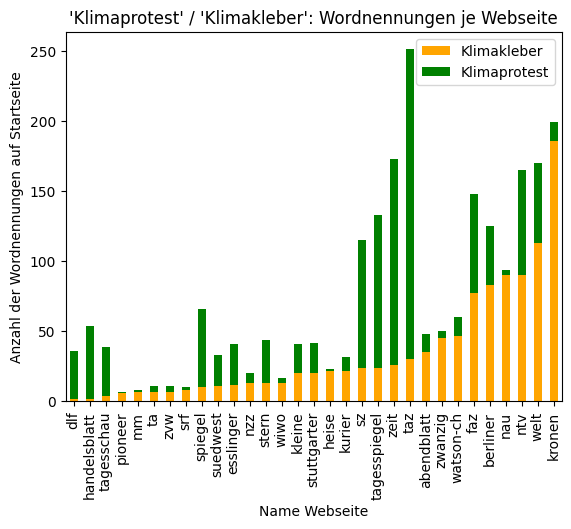

In [28]:
papers_df.plot(x="paper", y=[ "sum_KK", "sum_KP"], label=["Klimakleber", "Klimaprotest"], color= ["orange", "green"],kind= "bar", stacked= True)
plt.xlabel("Name Webseite")
plt.ylabel("Anzahl der Wordnennungen auf Startseite")
plt.title("'Klimaprotest' / 'Klimakleber': Wordnennungen je Webseite")
plt.legend()


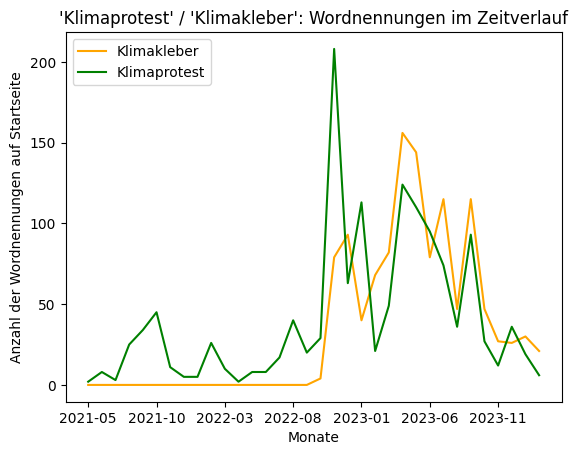

In [82]:
months_df.set_index('publication_month').plot(color= ["orange", "green"])
plt.legend(["Klimakleber", "Klimaprotest"],loc='upper left')
plt.xlabel("Monate")
plt.ylabel("Anzahl der Wordnennungen auf Startseite")
plt.title("'Klimaprotest' / 'Klimakleber': Wordnennungen im Zeitverlauf")
plt.show()